# DAGMC Overlap Debug
Script to reproduce the "impossible" overlaps issue with DAGMC geometry.

In [1]:
%pip install git+https://github.com/gumyr/build123d git+https://github.com/CadQuery/cadquery git+https://github.com/fusion-energy/cad_to_dagmc git+https://github.com/openmsr/CAD_to_OpenMC jupyter-cadquery gmsh pyvista~=0.39.1 trame==2.5.2

  Cloning https://github.com/gumyr/build123d to /private/var/folders/w4/hn239bwj10b0dz28qflwmnnc0000gn/T/pip-req-build-2df5h27h
  Running command git clone --filter=blob:none --quiet https://github.com/gumyr/build123d /private/var/folders/w4/hn239bwj10b0dz28qflwmnnc0000gn/T/pip-req-build-2df5h27h
  Resolved https://github.com/gumyr/build123d to commit 8970b73e462e0a0d22884e552cee1916bf742f58
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/CadQuery/cadquery to /private/var/folders/w4/hn239bwj10b0dz28qflwmnnc0000gn/T/pip-req-build-qillclg9
  Running command git clone --filter=blob:none --quiet https://github.com/CadQuery/cadquery /private/var/folders/w4/hn239bwj10b0dz28qflwmnnc0000gn/T/pip-req-build-qillclg9
  Resolved https://github.com/CadQuery/cadquery to commit e8d74474ca4869d014cba6e1f835cdabad86bf88
  Installing build dependencies ... done
  Getting requirements to bu

# Helper functions

In [1]:
import matplotlib.pyplot as plt

import build123d as bd
import cadquery as cq
from jupyter_cadquery import show

def build_toroidal_geometry(num_layers: int, major_radius: float = 1000, layer_thickness: float = 50):
    layers = [bd.Solid.make_torus(major_radius, layer_thickness)]

    for _ in range(num_layers-1):
        next_layer = layers[-1].faces()[0].thicken(layer_thickness)
        layers.append(next_layer)

    cmp = bd.Compound.make_compound(layers)
    show(cmp, transparent=True)
    return cmp


objc[1518]: Class vtkCocoaTimer is implemented in both /Users/alex/Programming/neutronics-cad/.direnv/python-3.11/lib/python3.11/site-packages/vtkmodules/.dylibs/libvtkRenderingUI-9.2.9.2.5.dylib (0x10dbc03f0) and /Users/alex/Programming/neutronics-cad/.direnv/python-3.11/lib/python3.11/site-packages/vtkmodules/.dylibs/libvtkRenderingUI-9.2.dylib (0x2905b43e8). One of the two will be used. Which one is undefined.
objc[1518]: Class vtkCocoaFullScreenWindow is implemented in both /Users/alex/Programming/neutronics-cad/.direnv/python-3.11/lib/python3.11/site-packages/vtkmodules/.dylibs/libvtkRenderingOpenGL2-9.2.9.2.5.dylib (0x13ad25fa8) and /Users/alex/Programming/neutronics-cad/.direnv/python-3.11/lib/python3.11/site-packages/vtkmodules/.dylibs/libvtkRenderingOpenGL2-9.2.dylib (0x2bf14a020). One of the two will be used. Which one is undefined.
objc[1518]: Class vtkCocoaServer is implemented in both /Users/alex/Programming/neutronics-cad/.direnv/python-3.11/lib/python3.11/site-packages/v

Overwriting auto display for cadquery Workplane and Shape


# Build Geometry

In [2]:
cmp = build_toroidal_geometry(4, major_radius=1000, layer_thickness=150)

CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

# Mesh with CAD-to-DAGMC

In [4]:
from cad_to_dagmc import CadToDagmc
import cad_to_dagmc
import build123d as bd
import cadquery as cq

def mesh_cad_to_dagmc(cmp, mesh_size: int = 20):
    num_vols = len(cmp.solids())
    gmsh, volumes = cad_to_dagmc.mesh_brep(cmp.wrapped._address(), mesh_size, mesh_size, 1)
    cad_to_dagmc.mesh_to_h5m_in_memory_method(volumes, ["vacuum"]*num_vols, "cad-to-dagmc.h5m", "cad-to-dagmc.msh")

In [5]:
mesh_cad_to_dagmc(cmp, 40)

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 30%] Meshing curve 3 (Circle)
Info    : [ 40%] Meshing curve 4 (Circle)
Info    : [ 50%] Meshing curve 5 (Circle)
Info    : [ 70%] Meshing curve 6 (Circle)
Info    : [ 80%] Meshing curve 7 (Circle)
Info    : [ 90%] Meshing curve 8 (Circle)
Info    : Done meshing 1D (Wall 0.000613375s, CPU 0.000712s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Torus, MeshAdapt)
Info    : [ 30%] Meshing surface 2 (Torus, MeshAdapt)
Info    : [ 50%] Meshing surface 3 (Torus, MeshAdapt)
Info    : [ 80%] Meshing surface 4 (Torus, MeshAdapt)
Info    : Done meshing 2D (Wall 15.5791s, CPU 14.6548s)
Info    : 48928 nodes 98964 elements
Info    : Writing 'cad-to-dagmc.msh'...
Info    : Done writing 'cad-to-dagmc.msh'


## Visualize conformity of Mesh
Mesh is properly imprinted/merged. No possibility of true overlaps.

*Note: Cad-to-DAGMC main branch by default only saves the mesh of the last layer, so you may see only 2 surfaces.*

*Note: if this step fails your Gmsh was likely not compiled with FLTK support.*

-------------------------------------------------------
Version       : 4.11.1
License       : GNU General Public License
Build OS      : MacOSARM-sdk
Build date    : 20221221
Build host    : gmsh.info
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack Lapack[petsc] MathEx[contrib] Med Mesh Metis[contrib] Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom PETSc Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TouchBar Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.4.0
PETSc version : 3.17.4 (real arithmtic)
OCC version   : 7.6.1
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


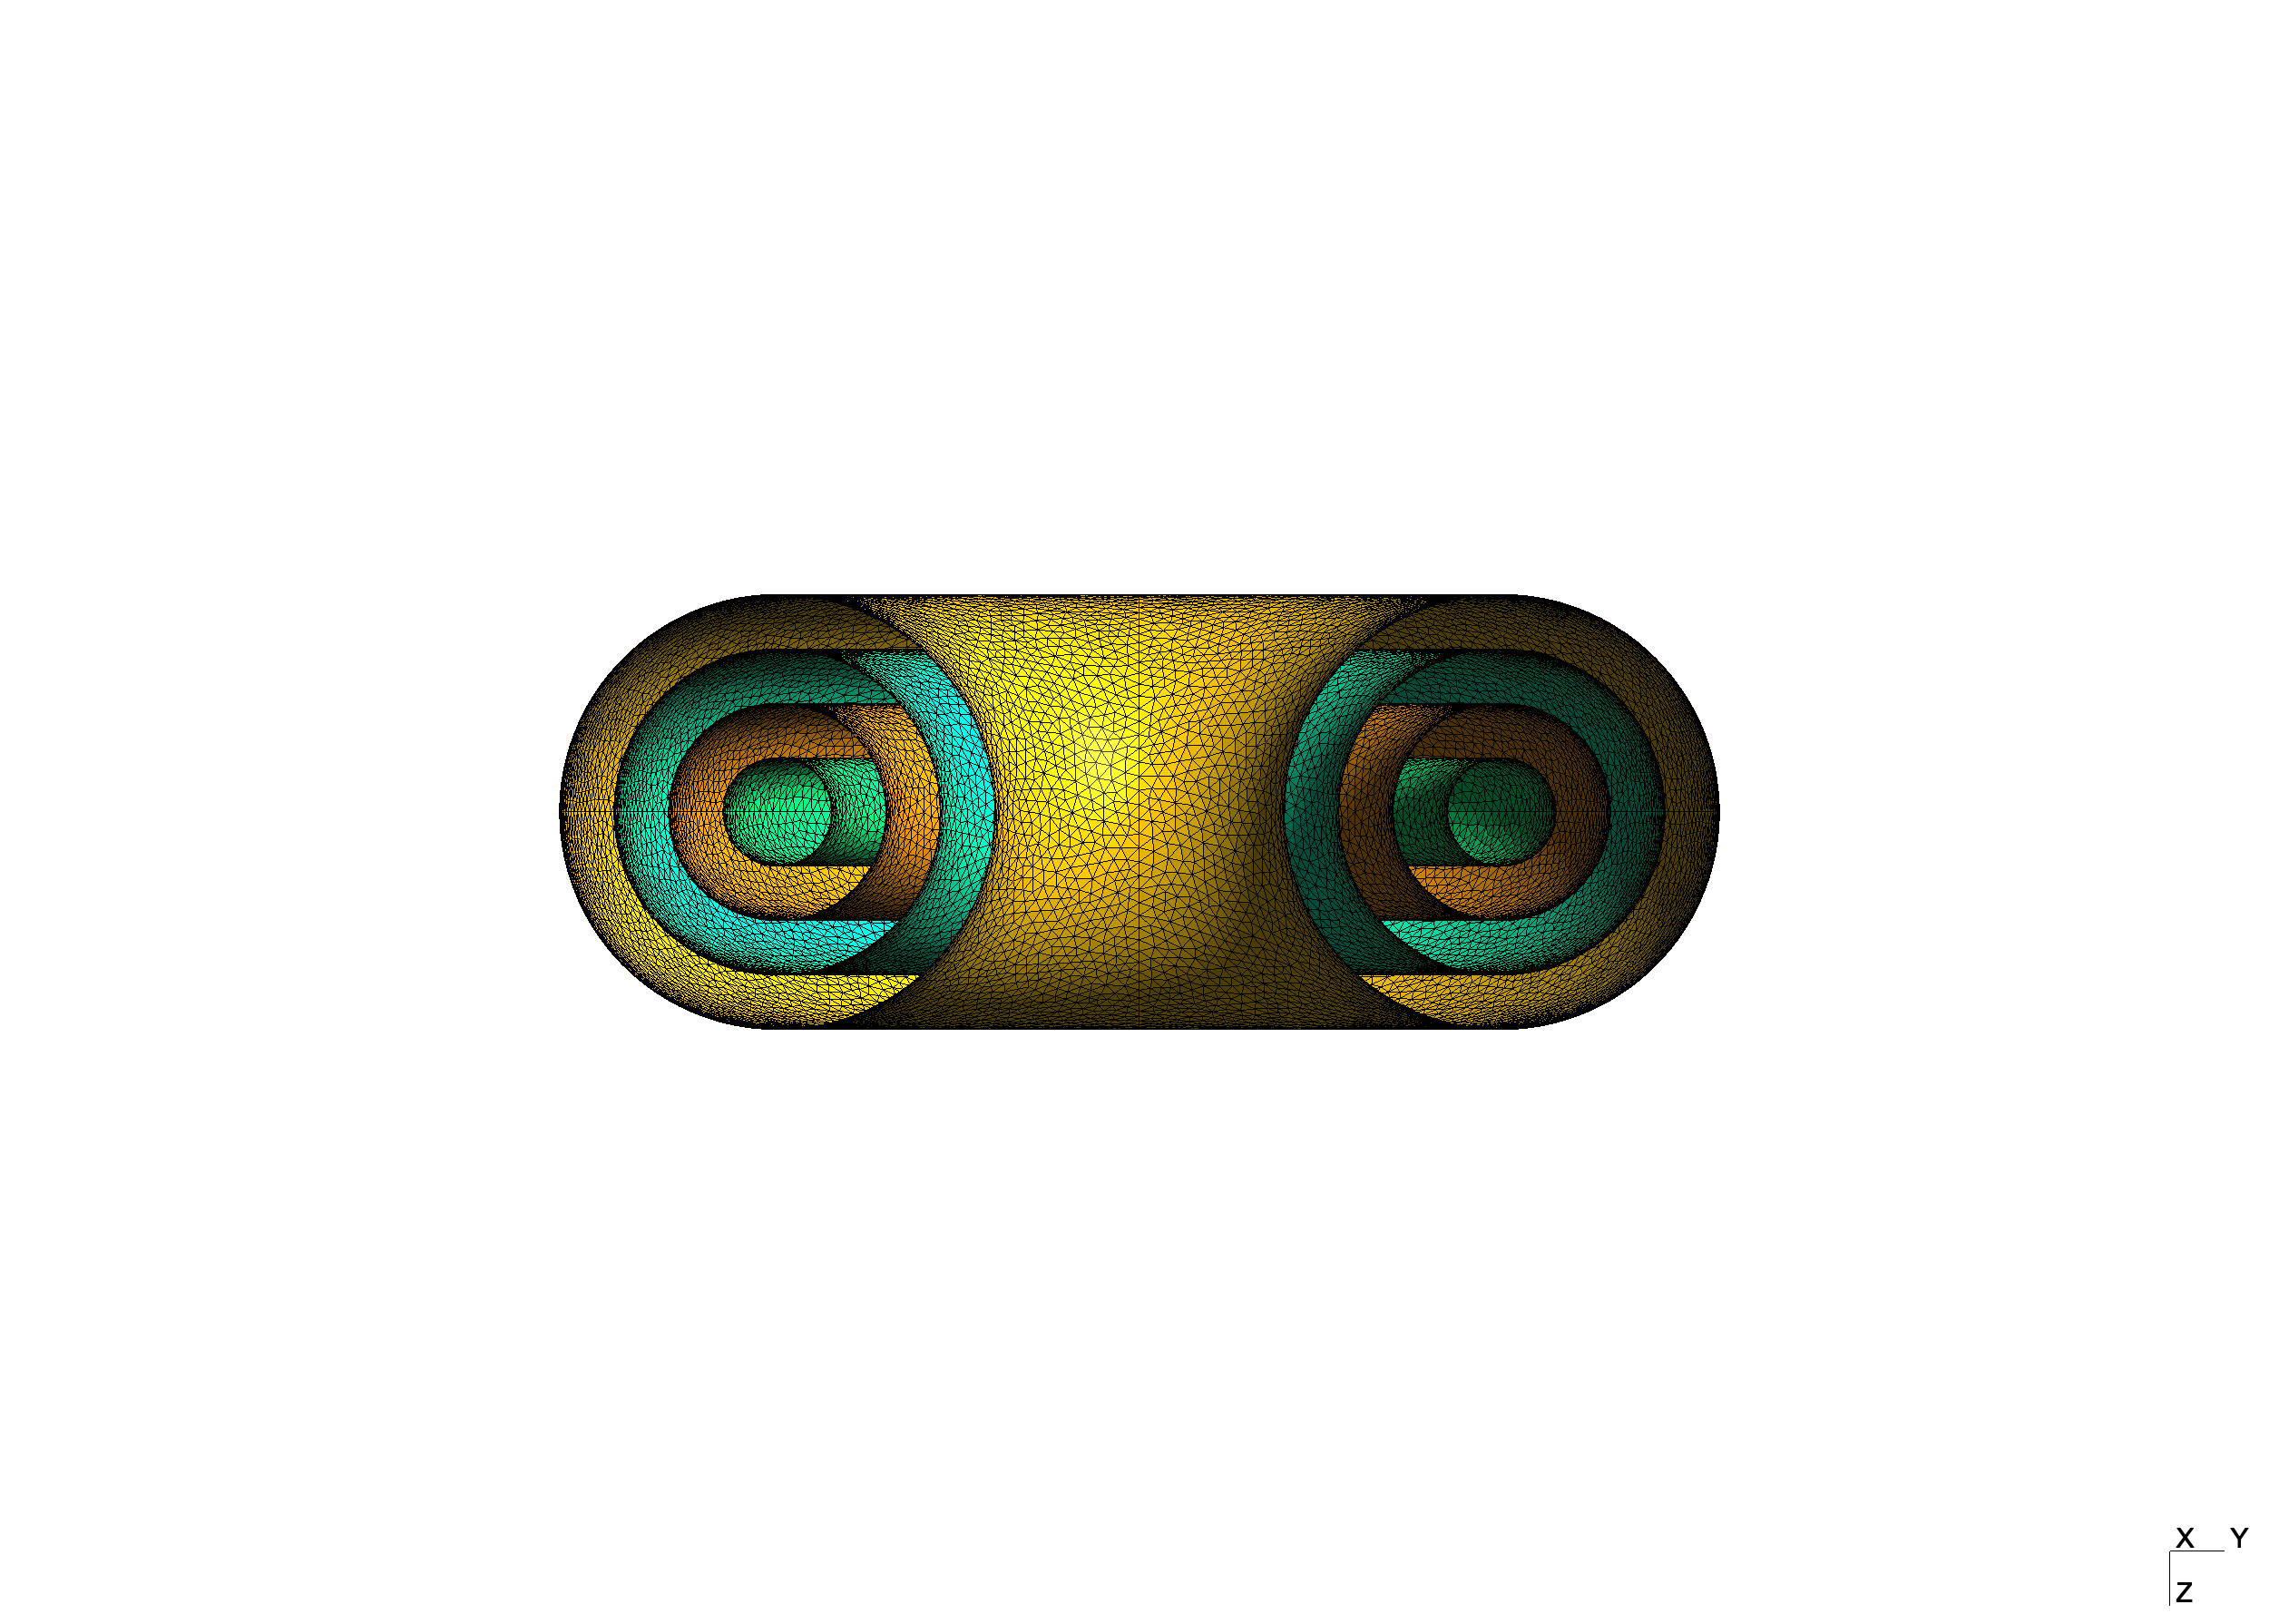

In [6]:
import gmsh
from contextlib import contextmanager
from IPython.display import display
from IPython.core.display import Image

@contextmanager
def gmsh_initialize():
    gmsh.initialize()
    gmsh.fltk.initialize()
    try:
        yield
    finally:
        gmsh.fltk.finalize()
        gmsh.finalize()

with gmsh_initialize():
    gmsh.option.setNumber("General.Terminal", 0)
    gmsh.merge("cad-to-dagmc.msh")
    gmsh.option.setNumber("Mesh.SurfaceFaces", 1)  # Show solid mesh faces
    gmsh.option.set_number("Mesh.Clip", 1)
    gmsh.option.setNumber("General.Trackball", 0)
    gmsh.option.set_number("General.RotationX", 90)
    gmsh.option.set_number("General.RotationZ", 270)
    gmsh.write("output.png")
    gmsh.write("output.msh")
    display(Image("output.png"))


## Check overlaps

The DAGMC overlap checker shows overlaps between all volumes, which is clearly not possible.

In [7]:
!/opt/dagmc/bin/overlap_check cad-to-dagmc.h5m

NOTICE: 
	 Performing overlap check using triangle vertex locations only.
	 Use the '-p' option to check more points on the triangle edges.
	 Run '$ overlap_check --help' for more information.

Running overlap check:
100% |===============================================================>|+
Overlap locations found: 3
Overlap Location: -502.62 -842.995 -148.85
Overlapping volumes: 1 2 3 4 
Overlap Location: 1053.49 456.745 -260.818
Overlapping volumes: 2 3 4 
Overlap Location: -515.518 -260.129 -154.71
Overlapping volumes: 3 4 


In [8]:
!/opt/moab/bin/mbconvert cad-to-dagmc.h5m cad-to-dagmc.vtk

Read "cad-to-dagmc.h5m"
Wrote "cad-to-dagmc.vtk"


In [9]:
import pyvista as pv
pl = pv.Plotter()
mesh = pv.read("cad-to-dagmc.vtk")
clipped = mesh.clip('y', invert=False)
pl.add_mesh(clipped, color="cornflowerblue")
pl.background_color = "white"
pl.show()

Widget(value="<iframe src='http://localhost:52334/index.html?ui=P_0x2cb13c450_0&reconnect=auto' style='width: …

# Mesh with CAD-to-OpenMC Cadquery Backend

In [10]:
import CAD_to_OpenMC.assembly as ab
import cadquery as cq

ab.mesher_config['min_mesh_size']=40
ab.mesher_config['max_mesh_size']=40
a = ab.Assembly()
a.verbose = True

ents = [ab.Entity(cq.Solid(s.wrapped)) for s in cmp.solids()]
a.entities = ents

a.solids_to_h5m(None, "cad-to-openmc.h5m", backend="stl")

INFO: mesher reusing 673432948 vol_1_face0.stl
INFO: mesher reusing 1015113731 vol_2_face0.stl
INFO: mesher reusing 1015205859 vol_3_face0.stl
SUMMARY: solid_id material_tag     stl-file        
SUMMARY:        1 vacuum           volume_1.stl    
SUMMARY:        2 vacuum           volume_2.stl    
SUMMARY:        3 vacuum           volume_3.stl    
SUMMARY:        4 vacuum           volume_4.stl    
INFO: checking surfaces and reparing normals
INFO: reassembling stl-files into h5m structure
INFO: writing geometry to h5m: "cad-to-openmc.h5m".


## Check overlaps

Again, impossible overlaps exists even when using different meshing software.

In [11]:
!/opt/dagmc/bin/overlap_check cad-to-openmc.h5m

NOTICE: 
	 Performing overlap check using triangle vertex locations only.
	 Use the '-p' option to check more points on the triangle edges.
	 Run '$ overlap_check --help' for more information.

Running overlap check:
100% |===============================================================>|+
Overlap locations found: 3
Overlap Location: 819.047 -429.869 -129.904
Overlapping volumes: 1 2 3 4 
Overlap Location: 79.8867 -698.799 44.7127
Overlapping volumes: 2 3 4 
Overlap Location: 193.887 -674.945 -337.401
Overlapping volumes: 3 4 


**Note the "impossible" overlaps between cells 1, 2, and 3.**

# Visualize geometry 

In [19]:
# with bd.GridLocations(300, 1,)
new_cmp = []
for i, e in enumerate(cmp.solids()):
    new_cmp.append(e.translate((0, 0, i*1200)))

show(*new_cmp)

100% ⋮————————————————————————————————————————————————————————————⋮ (4/4)  0.50s


CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…